In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/jovyan/work/_dataset/data_csv.csv")
df.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [3]:
import pandas as pd
import numpy as np

# Qchat_10_Score 결측치 보완
# Step 1: Prepare your data
# Subset A - Rows with non-null values
subset_A = df.dropna(subset=['Qchat_10_Score'])

# Subset B - Rows with null values
subset_B = df[df['Qchat_10_Score'].isnull()]

# Step 2: Randomly impute missing values in Subset B
imputed_values = np.random.choice(subset_A['Qchat_10_Score'], size=len(subset_B), replace=True)
subset_B['Qchat_10_Score'] = imputed_values

# Step 3: Combine imputed values with original data
imputed_data = pd.concat([subset_A, subset_B])


# 위 변수를 제외한 나머지 변수들의 결측치 보완
from sklearn.impute import SimpleImputer

# replace '?' with NaN
imputed_data[['Depression', 'Social_Responsiveness_Scale', 'Social/Behavioural Issues']].replace('?', np.nan, inplace=True)

# Imputing null values with most_frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
imputed_data[['Depression', 'Social_Responsiveness_Scale', 'Social/Behavioural Issues']] = imputer.fit_transform(df[['Depression', 'Social_Responsiveness_Scale', 'Social/Behavioural Issues']])

/tmp/ipykernel_29273/1580444352.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_B['Qchat_10_Score'] = imputed_values
/tmp/ipykernel_29273/1580444352.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_data[['Depression', 'Social_Responsiveness_Scale', 'Social/Behavioural Issues']].replace('?', np.nan, inplace=True)


In [4]:
# 3개 이상의 범주를 갖는 Ethnicity, Who completed the test 변수 수치형으로 인코딩

encod_data=imputed_data.copy()
freq1 = encod_data['Ethnicity'].value_counts(normalize=True)
freq2 = encod_data['Who_completed_the_test'].value_counts(normalize=True)

# Map the values to their frequencies
encod_data['Ethnicity_en'] = encod_data['Ethnicity'].map(freq1)
encod_data['Who_completed_the_test_en'] = encod_data['Who_completed_the_test'].map(freq2)

#removal
encod_data =encod_data.drop('Ethnicity', axis=1)
encod_data =encod_data.drop('Who_completed_the_test', axis=1)
encod_data

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Jaundice,Family_mem_with_ASD,ASD_traits,Ethnicity_en,Who_completed_the_test_en
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,Yes,No,No,0.020655,0.331486
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,Yes,No,Yes,0.276574,0.331486
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Yes,No,Yes,0.182368,0.331486
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,No,No,Yes,0.020151,0.331486
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,No,No,Yes,0.276574,0.331486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,1610,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,No,Yes,Yes,0.197481,0.621159
1632,1633,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Yes,Yes,Yes,0.197481,0.014610
1646,1647,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,No,Yes,Yes,0.197481,0.621159
1669,1670,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,No,Yes,Yes,0.197481,0.621159


In [5]:
# 2개의 범주를 갖는 변수 수치형 인코딩

bools=['Social_Responsiveness_Scale', 'Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders', 'Depression', 'Global developmental delay/intellectual disability', 'Social/Behavioural Issues', 'Anxiety_disorder', 'Jaundice', 'Family_mem_with_ASD', 'ASD_traits']

encod_data1 = encod_data.copy()  # Make a copy of the original DataFrame

for col in bools:
    encod_data1[col] = encod_data1[col].replace({'Yes': 1, 'No': 0})

encod_data1

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Jaundice,Family_mem_with_ASD,ASD_traits,Ethnicity_en,Who_completed_the_test_en
0,1,0,0,0,0,0,0,1,1,0,...,1,1,1,1,F,1,0,0,0.020655,0.331486
1,2,1,1,0,0,0,1,1,0,0,...,1,1,2,1,M,1,0,1,0.276574,0.331486
2,3,1,0,0,0,0,0,1,1,0,...,1,1,4,1,M,1,0,1,0.182368,0.331486
3,4,1,1,1,1,1,1,1,1,1,...,1,1,2,1,M,0,0,1,0.020151,0.331486
4,5,1,1,0,1,1,1,1,1,1,...,1,1,1,1,F,0,0,1,0.276574,0.331486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,1610,0,0,0,0,0,0,0,0,0,...,0,0,1,0,M,0,1,1,0.197481,0.621159
1632,1633,0,0,0,0,0,0,0,0,0,...,0,0,1,0,M,1,1,1,0.197481,0.014610
1646,1647,0,0,0,0,0,0,0,0,0,...,0,0,1,0,M,0,1,1,0.197481,0.621159
1669,1670,0,0,0,0,0,0,0,0,0,...,0,0,1,0,M,0,1,1,0.197481,0.621159


In [6]:
# 마지막으로 성별 인코딩

from sklearn.preprocessing import OrdinalEncoder

# Initialize the encoder
encoder = OrdinalEncoder()

# Fit and transform the data
enc = encoder.fit_transform(encod_data1["Sex"].values.reshape(-1, 1))

# Convert the encoded data back to a dataframe
encoded_df = pd.DataFrame(enc, columns=['Sex_en'])

encoded_data = pd.concat([encod_data1,encoded_df], axis=1)
encoded_data.drop('Sex', axis=1,inplace=True)
encoded_data.drop(encoded_data.columns[0], axis=1,inplace=True)
encoded_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Jaundice,Family_mem_with_ASD,ASD_traits,Ethnicity_en,Who_completed_the_test_en,Sex_en
0,0,0,0,0,0,0,1,1,0,1,...,1,1,1,1,1,0,0,0.020655,0.331486,0.0
1,1,1,0,0,0,1,1,0,0,0,...,1,1,2,1,1,0,1,0.276574,0.331486,1.0
2,1,0,0,0,0,0,1,1,0,1,...,1,1,4,1,1,0,1,0.182368,0.331486,1.0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,0,0,1,0.020151,0.331486,1.0
4,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0.276574,0.331486,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0.197481,0.621159,0.0
1632,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,0.197481,0.014610,1.0
1646,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0.197481,0.621159,1.0
1669,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0.197481,0.621159,0.0


In [7]:
from pycaret.classification import *

In [8]:
clf = setup(data=encoded_data, target='ASD_traits', train_size=0.7, session_id=10)

,Description,Value
0,Session id,10
1,Target,ASD_traits
2,Target type,Binary
3,Original data shape,"(1985, 27)"
4,Transformed data shape,"(1985, 27)"
5,Transformed train set shape,"(1389, 27)"
6,Transformed test set shape,"(596, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [9]:
best3models = compare_models(sort='Accuracy', n_select=3, fold=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1250
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3150
gbc,Gradient Boosting Classifier,0.9978,1.0000,1.0000,0.9960,0.9980,0.9957,0.9957,0.0700
xgboost,Extreme Gradient Boosting,0.9964,1.0000,0.9960,0.9973,0.9967,0.9928,0.9928,0.0500
et,Extra Trees Classifier,0.9892,0.9997,0.9907,0.9894,0.9900,0.9783,0.9783,0.1050
ada,Ada Boost Classifier,0.9842,0.9979,0.9761,0.9946,0.9852,0.9682,0.9684,0.0500
dt,Decision Tree Classifier,0.9827,0.9836,0.9734,0.9946,0.9839,0.9653,0.9655,0.6200
knn,K Neighbors Classifier,0.9194,0.9698,0.9056,0.9433,0.9241,0.8382,0.8390,0.6600
lda,Linear Discriminant Analysis,0.8855,0.9544,0.8444,0.9380,0.8886,0.7716,0.7763,0.0200
lr,Logistic Regression,0.8690,0.9706,0.7912,0.9595,0.8672,0.7403,0.7538,0.7350


### 데이터셋 튜닝

In [10]:
print(encoded_data['ASD_traits'].value_counts())

class_count_1, class_count_0 = encoded_data['ASD_traits'].value_counts()

class_0 = encoded_data[encoded_data["ASD_traits"] == 0]
class_1 = encoded_data[encoded_data["ASD_traits"] == 1]

class_1_under = class_1.sample(class_count_0)

data_under = pd.concat([class_0, class_1_under], axis = 0).reset_index().drop("index", axis = 1)
data_under['ASD_traits'].value_counts()

ASD_traits
1    1074
0     911
Name: count, dtype: int64


ASD_traits
0    911
1    911
Name: count, dtype: int64

In [11]:
clf = setup(data=data_under, target='ASD_traits', train_size=0.7, session_id=11)

,Description,Value
0,Session id,11
1,Target,ASD_traits
2,Target type,Binary
3,Original data shape,"(1822, 27)"
4,Transformed data shape,"(1822, 27)"
5,Transformed train set shape,"(1275, 27)"
6,Transformed test set shape,"(547, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [12]:
best3models = compare_models(sort='Accuracy', n_select=3, fold=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1350
gbc,Gradient Boosting Classifier,0.9969,1.0000,1.0000,0.9938,0.9969,0.9937,0.9938,0.0600
lightgbm,Light Gradient Boosting Machine,0.9969,0.9999,0.9984,0.9953,0.9969,0.9937,0.9937,0.3800
xgboost,Extreme Gradient Boosting,0.9945,0.9999,0.9922,0.9968,0.9945,0.9890,0.9890,0.0450
ada,Ada Boost Classifier,0.9898,0.9996,0.9859,0.9937,0.9898,0.9796,0.9796,0.0400
et,Extra Trees Classifier,0.9874,0.9995,0.9890,0.9859,0.9875,0.9749,0.9749,0.1000
dt,Decision Tree Classifier,0.9867,0.9867,0.9843,0.9890,0.9866,0.9733,0.9733,0.0300
knn,K Neighbors Classifier,0.9177,0.9732,0.9027,0.9309,0.9165,0.8353,0.8358,0.0600
lr,Logistic Regression,0.8659,0.9683,0.7661,0.9571,0.8509,0.7317,0.7469,0.0400
lda,Linear Discriminant Analysis,0.8604,0.9556,0.7676,0.9421,0.8456,0.7207,0.7336,0.0200


### 추가 모델 분석

In [13]:
clf = setup(data=encoded_data, target='ASD_traits', train_size=0.7, session_id=10)

,Description,Value
0,Session id,10
1,Target,ASD_traits
2,Target type,Binary
3,Original data shape,"(1985, 27)"
4,Transformed data shape,"(1985, 27)"
5,Transformed train set shape,"(1389, 27)"
6,Transformed test set shape,"(596, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [14]:
rf = create_model('rf', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [15]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

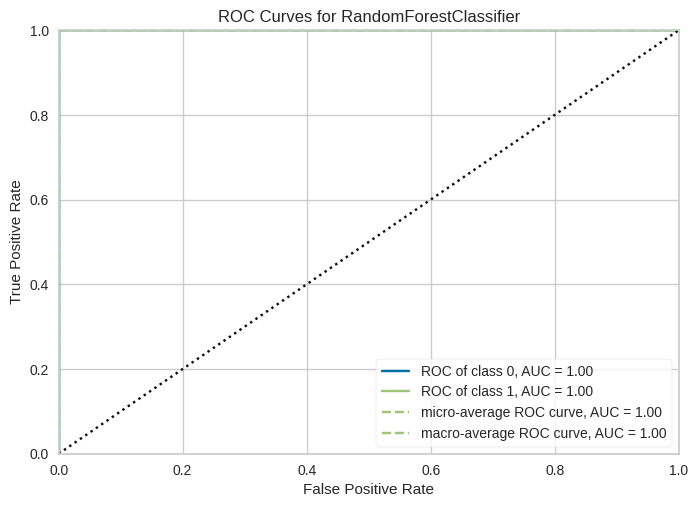

In [16]:
plot_model(rf, 'auc') # ROC 커브

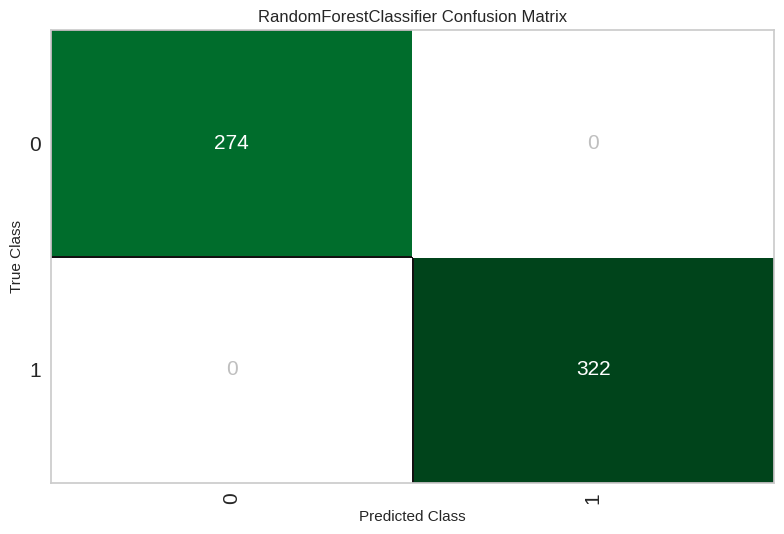

In [17]:
plot_model(rf, 'confusion_matrix')

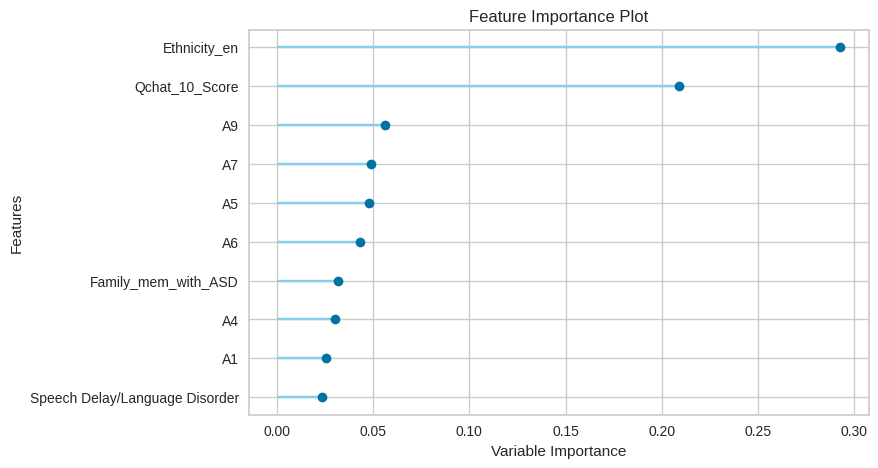

In [18]:
plot_model(rf, 'feature') # 피처 중요도

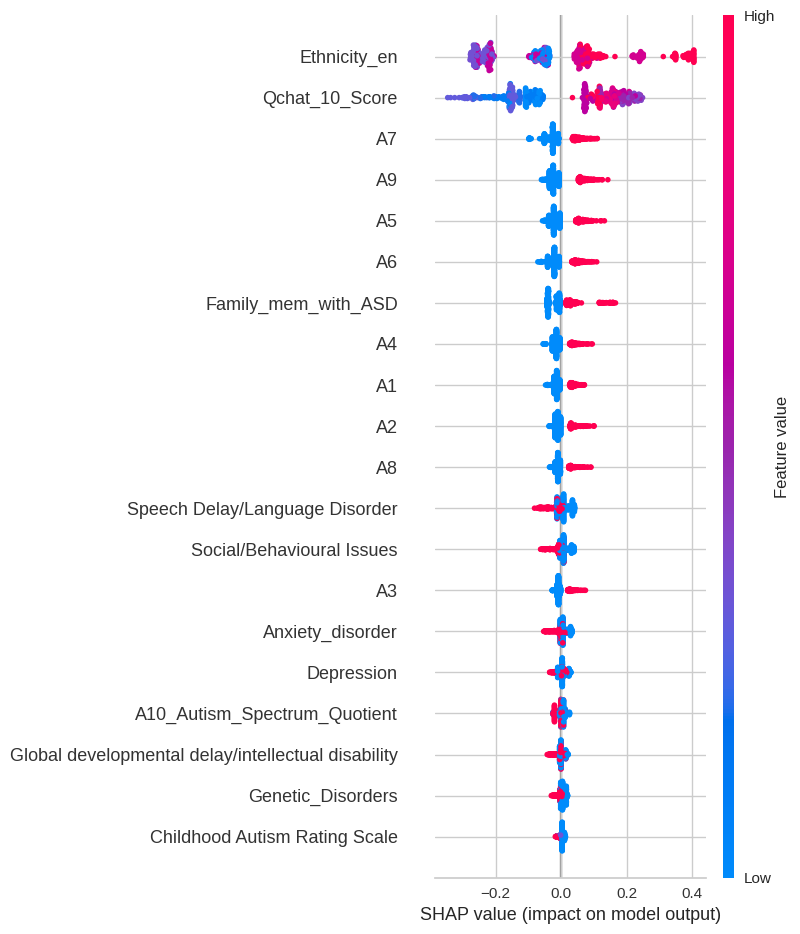

In [19]:
interpret_model(rf)

In [30]:
data_under[:1]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Jaundice,Family_mem_with_ASD,ASD_traits,Ethnicity_en,Who_completed_the_test_en,Sex_en
0,0,0,0,0,0,0,1,1,0,1,...,1,1,1,1,1,0,0,0.020655,0.331486,0.0


In [33]:
interpret_model(rf, plot='reason', X_new_sample=data_under[:1])